# ABOUT THE PROJECT

Topic: <b> Analysis of emergency calls in Montgomery County, Pennsylvania. </b>
<br> <br>
The purpose of the work was to see where the most emergency calls are made and for what reason people most often call for help.
<br> <br>
This work was my final project for the course <i> "Data Processing and Analysis in Python" </i> (Faculty of Economic Sciences, University of Warsaw), which was my first introductory class to this programming language. My main focus was on cleaning up the data and separating it in such a way that the analysis of the data in this set would not cause any major problems.
<br> <br>
Data source: https://www.kaggle.com/mchirico/montcoalert

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import statistics
%matplotlib inline

In [2]:
short=pd.read_csv("911.csv", sep=",")

In [3]:
short = short.rename(columns={'lat': 'Latitude', 'lng': 'Longitude','desc': 'Accident_description','zip': 'Zip_code','title': 'Accident_category','timeStamp': 'Call_date_and_time','twp': 'Township','addr': 'Address','e': 'Column_index(always_1)'})

In [4]:
short=short.drop('Column_index(always_1)', axis=1) #deleting an unnecessary column

In [5]:
short=short.dropna() #deleting rows with missing data

In [6]:
short.reset_index(drop=True)

,Latitude,Longitude,Accident_description,Zip_code,Accident_category,Call_date_and_time,Township,Address
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST
...,...,...,...,...,...,...,...,...
583194,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE
583195,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR
583196,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD
583197,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE


In [7]:
#changing the way the postal code is written from 19525.0 to 19-525
short.loc[:,'Zip_code'].dtype
short.loc[:,'Zip_code']=short.loc[:,'Zip_code'].astype(int)
short.loc[:,'Zip_code']=short.loc[:,'Zip_code'].astype(str)

C:\Users\magda\AppData\Local\Temp\ipykernel_14568\760812981.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  short.loc[:,'Zip_code']=short.loc[:,'Zip_code'].astype(int)


In [8]:
listofzipcodes = short['Zip_code'].to_list()

In [9]:
listofzipcodes2=list()
for x in listofzipcodes:
    zip=x[0:2]+'-'+x[2:5]
    listofzipcodes2.append(zip)

In [10]:
short['Zip_code']=listofzipcodes2

In [11]:
#splitting the date and time of the call to be two separate columns
short[['Call_date','Call_time']] = short.Call_date_and_time.apply(lambda x: pd.Series(str(x).split(" ")))
short=short.drop('Call_date_and_time', axis=1)

In [12]:
print(short['Accident_description'][0])
print(short['Accident_description'][1])
print(short['Accident_description'][2]) 
#In the 'Accident_description column' there is address, township, station number, then call date and time. I need the data following the second semicolon

REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;
BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;
HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;


In [13]:
listfromcolumn = short['Accident_description'].tolist() 

In [14]:
listfromcolumn2=list()
for x in listfromcolumn:
    #x=x.split(";")
    #x.append(listazkolumny2)
    smalllist=x.split(";")
    listfromcolumn2.append(smalllist)
    
#turning the column into a list, then into a list of lists

In [15]:
listfromcolumn2[0:6] #unfortunately some lists have 4/5 values and don't have the information i need to get (station number)

[['REINDEER CT & DEAD END',
  '  NEW HANOVER',
  ' Station 332',
  ' 2015-12-10 @ 17:10:52',
  ''],
 ['BRIAR PATH & WHITEMARSH LN',
  '  HATFIELD TOWNSHIP',
  ' Station 345',
  ' 2015-12-10 @ 17:29:21',
  ''],
 ['HAWS AVE', ' NORRISTOWN', ' 2015-12-10 @ 14:39:21-Station:STA27', ''],
 ['AIRY ST & SWEDE ST',
  '  NORRISTOWN',
  ' Station 308A',
  ' 2015-12-10 @ 16:47:36',
  ''],
 ['CANNON AVE & W 9TH ST',
  '  LANSDALE',
  ' Station 345',
  ' 2015-12-10 @ 15:39:04',
  ''],
 ['LAUREL AVE & OAKDALE AVE',
  '  HORSHAM',
  ' Station 352',
  ' 2015-12-10 @ 16:46:48',
  '']]

In [16]:
set1=list()
for x in listfromcolumn2:
    y=len(x)
    set1.append(y)

In [17]:
unique1=set(set1)

In [18]:
unique1 #making sure there is no case in which more than 1 element is missing from the list

{4, 5}

In [19]:
#z listazkolumny 2, z każdej jej podlisty, wybiorę tylko element, gdzie jest podany numer spacji, potem skracam go, żeby został tylko numer (bo zrobię oddzielną kolumnę na jedyną potrzebną ze starej kolumny informację)
anotherlist=list()
for x in listfromcolumn2:
    y=x[2]
    if(y[0]==" "):
        y=y[1:]
    if (len(y)>22):
        y=y[22:]
    if (len(y)==21):
        y="NaN"    
    if (y[0:8]=="Station "):
        y=y[8:]
    if (y[0:8]=="Station:"): # i assume that if station is called 'STA27' then the station number is '27' and 'STA' is unnecessary
        y=y[11:] 
    anotherlist.append(y)


In [20]:
short['Station_number'] = anotherlist

In [21]:
short=short.drop('Accident_description', axis=1)

In [22]:
short.head()

,Latitude,Longitude,Zip_code,Accident_category,Township,Address,Call_date,Call_time,Station_number
0,40.297876,-75.581294,19-525,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,2015-12-10,17:10:52,332
1,40.258061,-75.264680,19-446,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,2015-12-10,17:29:21,345
2,40.121182,-75.351975,19-401,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,2015-12-10,14:39:21,27
3,40.116153,-75.343513,19-401,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,2015-12-10,16:47:36,308A
5,40.253473,-75.283245,19-446,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,2015-12-10,15:39:04,345


In [23]:
# I additionally want to separate the Accident Category so that it has category and description separately
short['Category_type'] = short['Accident_category'].apply(lambda Accident_category: Accident_category.split(':')[0]) #temporary column with accident category

In [24]:
short['Category_type'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [25]:
Accident_type=list()
for x in short["Accident_category"]:
    if x[0:2]=="EM":
        x=x[5:]
    if x[0:2]=="Fi":
        x=x[6:]
    if x[0:2]=="Tr":
        x=x[9:]
    Accident_type.append(x)

In [26]:
Accident_type

['BACK PAINS/INJURY',
 'DIABETIC EMERGENCY',
 'GAS-ODOR/LEAK',
 'CARDIAC EMERGENCY',
 'HEAD INJURY',
 'NAUSEA/VOMITING',
 'RESPIRATORY EMERGENCY',
 'SYNCOPAL EPISODE',
 'VEHICLE ACCIDENT -',
 'VEHICLE ACCIDENT -',
 'VEHICLE ACCIDENT -',
 'VEHICLE ACCIDENT -',
 'VEHICLE ACCIDENT -',
 'RESPIRATORY EMERGENCY',
 'DIZZINESS',
 'VEHICLE ACCIDENT',
 'DISABLED VEHICLE -',
 'VEHICLE ACCIDENT -',
 'DISABLED VEHICLE -',
 'APPLIANCE FIRE',
 'GENERAL WEAKNESS',
 'HEAD INJURY',
 'CARBON MONOXIDE DETECTOR',
 'DISABLED VEHICLE -',
 'RESPIRATORY EMERGENCY',
 'UNKNOWN MEDICAL EMERGENCY',
 'VEHICLE ACCIDENT -',
 'DISABLED VEHICLE -',
 'VEHICLE ACCIDENT -',
 'VEHICLE ACCIDENT -',
 'GAS-ODOR/LEAK',
 'UNRESPONSIVE SUBJECT',
 'VEHICLE ACCIDENT -',
 'VEHICLE ACCIDENT -',
 'VEHICLE ACCIDENT',
 'VEHICLE ACCIDENT',
 'VEHICLE ACCIDENT -',
 'VEHICLE ACCIDENT -',
 'VEHICLE ACCIDENT -',
 'CVA/STROKE',
 'FIRE ALARM',
 'ROAD OBSTRUCTION -',
 'CVA/STROKE',
 'SUBJECT IN PAIN',
 'SUBJECT IN PAIN',
 'DISABLED VEHICLE -',


In [27]:
short["Accident_category"]=Accident_type

In [28]:
short = short.rename(columns={'Category_type': 'Category', 'Accident_category': 'Accident_type'})

In [29]:
short.iloc[:, [0,1,2,9,3,4,5,7,6]] #I want the Category and Accident_type to be next to each other

,Latitude,Longitude,Zip_code,Category,Accident_type,Township,Address,Call_time,Call_date
0,40.297876,-75.581294,19-525,EMS,BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,17:10:52,2015-12-10
1,40.258061,-75.264680,19-446,EMS,DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17:29:21,2015-12-10
2,40.121182,-75.351975,19-401,Fire,GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,14:39:21,2015-12-10
3,40.116153,-75.343513,19-401,EMS,CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,16:47:36,2015-12-10
5,40.253473,-75.283245,19-446,EMS,HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,15:39:04,2015-12-10
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,19-403,Traffic,VEHICLE ACCIDENT -,EAST NORRITON,SUNSET AVE & WOODLAND AVE,15:46:51,2020-07-29
663518,40.136306,-75.428697,19-403,EMS,GENERAL WEAKNESS,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,15:52:19,2020-07-29
663519,40.013779,-75.300835,19-041,EMS,VEHICLE ACCIDENT,LOWER MERION,HAVERFORD STATION RD,15:52:52,2020-07-29
663520,40.121603,-75.351437,19-401,Fire,BUILDING FIRE,NORRISTOWN,MARSHALL ST & HAWS AVE,15:54:08,2020-07-29


In [30]:
short["Call_date"]=pd.to_datetime(short["Call_date"])
short['Call_year']=short['Call_date'].dt.year
short['Call_month']=short['Call_date'].dt.month
short['Call_dayoftheweek']=short['Call_date'].dt.day_name()

In [31]:
short=short.replace({'Call_month' : { 1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December' }})

In [32]:
short['Call_year'].value_counts(sort=False)

2015      6898
2016    124484
2017    123738
2018    132577
2019    130765
2020     64737
Name: Call_year, dtype: int64

In [33]:
arguments=(short['Call_year'].unique()).tolist()

In [34]:
values=list(short['Call_year'].value_counts(sort=False))

# BAR PLOT - number of calls by year

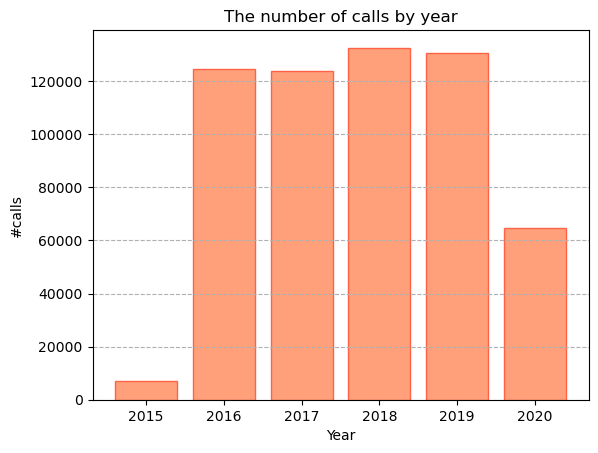

In [35]:
fig, ax= plt.subplots()
ax.bar(arguments, values, color='lightsalmon', edgecolor='tomato') 
ax.set_xlabel('Year') 
ax.set_ylabel('#calls') 
ax.set_title('The number of calls by year')
plt.grid(axis='y', linestyle='dashed')
plt.show()
#plt.savefig('The number of calls by year.jpg') 

In [44]:
#short.head(20)

# STACKED BAR CHART - number of calls by year and category

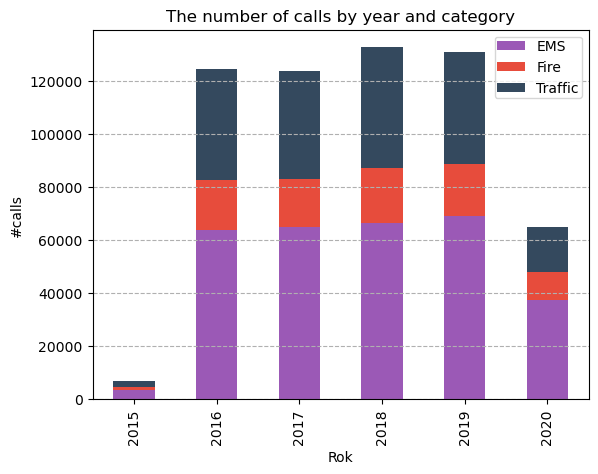

In [37]:
dataframe=short.groupby('Call_year')['Category'].value_counts()
dataframe.unstack().plot(kind='bar', stacked=True, xlabel='Rok',ylabel='#calls', title='The number of calls by year and category',color=["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]) #dodaję wykres, zmieniłam kolory, nadałam tytuły
plt.grid(axis='y', linestyle='dashed')
plt.legend(loc='upper right',borderpad=0.2)
plt.show()
#plt.savefig('The number of calls by year and category.jpg')

# Emergency calls in each township depending on accident category

Initially I had the idea to show the number of emergency calls by category on three separate charts. After making them, they turned out to be unreadable and did not introduce too much of anything interesting. I solved this problem with a chart at the end of the notebook that links them together. 

In [38]:
townships=(short['Township'].unique()).tolist() #list of townships
ems_number=list(short['Township'].loc[short['Category']=="EMS"].value_counts(sort=False))
fire_number=list(short['Township'].loc[short['Category']=="Fire"].value_counts(sort=False))
traffic_number=list(short['Township'].loc[short['Category']=="Traffic"].value_counts(sort=False))

Text(0.5, 1.0, 'The number of EMS category calls by townships')

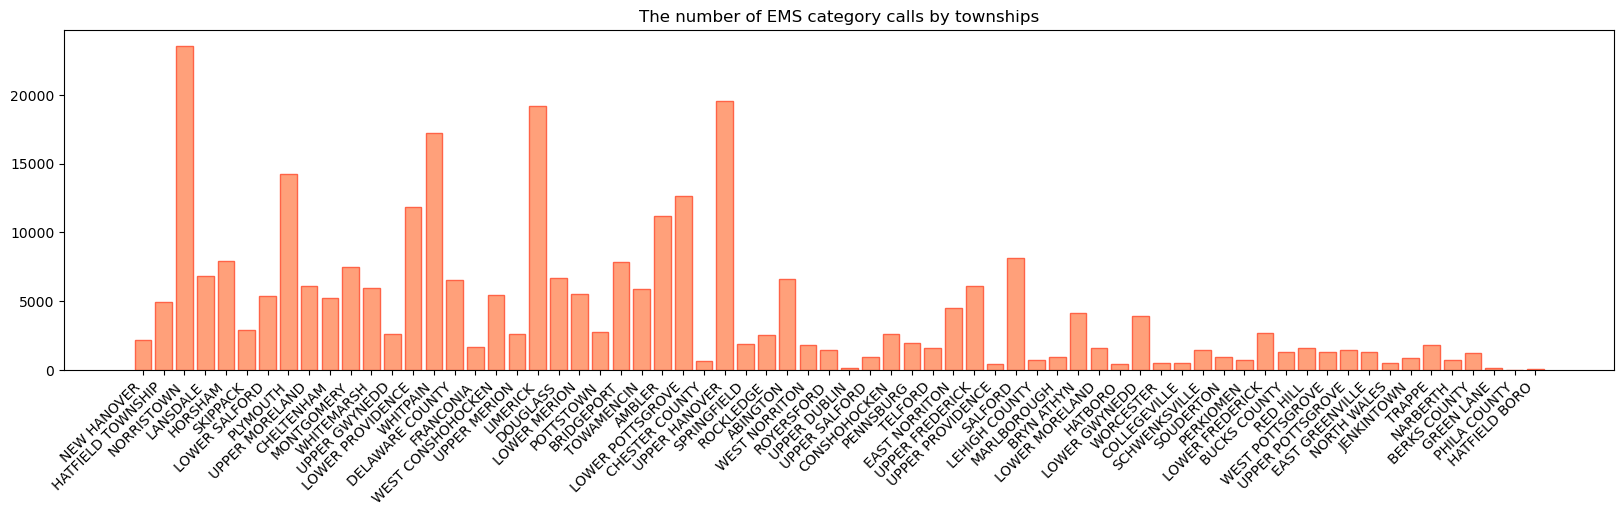

In [39]:
fig, ax= plt.subplots(figsize = (20,5))
ax.bar(townships, ems_number, color='lightsalmon', edgecolor='tomato')
fig.autofmt_xdate(rotation=45)
ax.set_title('The number of ''EMS'' category calls by townships') 

Text(0.5, 1.0, 'The number of Fire category calls by townships')

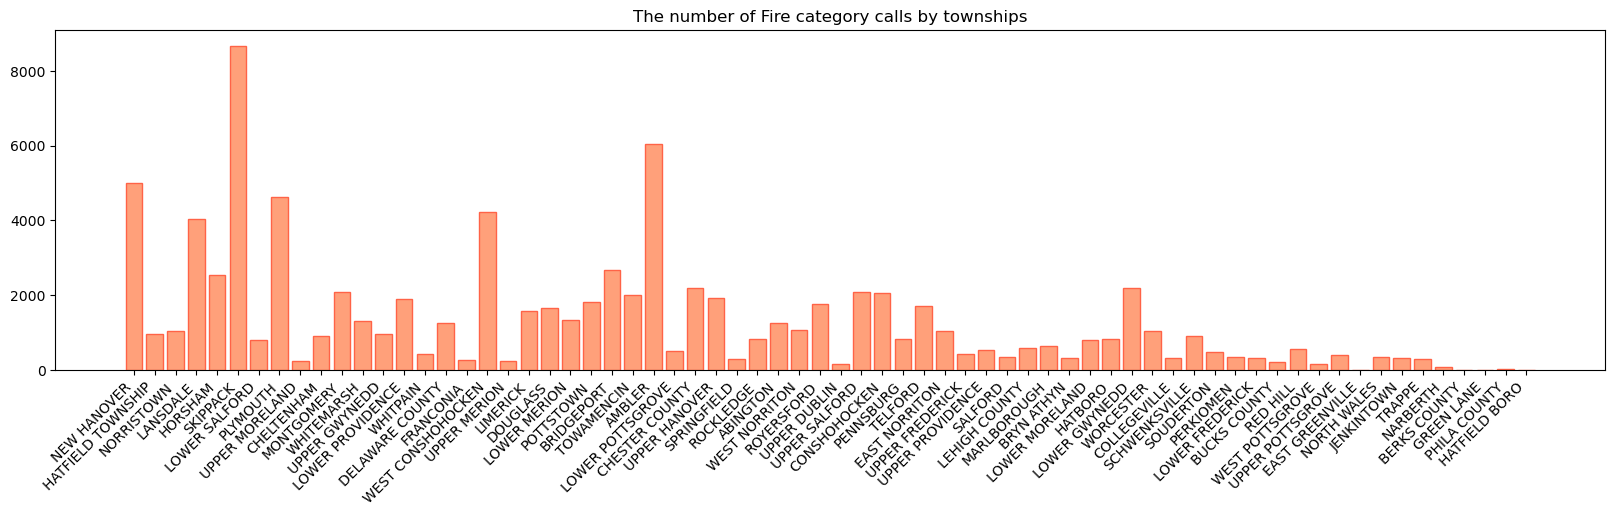

In [40]:
fig, ax= plt.subplots(figsize = (20,5))
ax.bar(townships, fire_number, color='lightsalmon', edgecolor='tomato')
fig.autofmt_xdate(rotation=45)
ax.set_title('The number of ''Fire'' category calls by townships')

Text(0.5, 1.0, 'The number of Traffic category calls by townships')

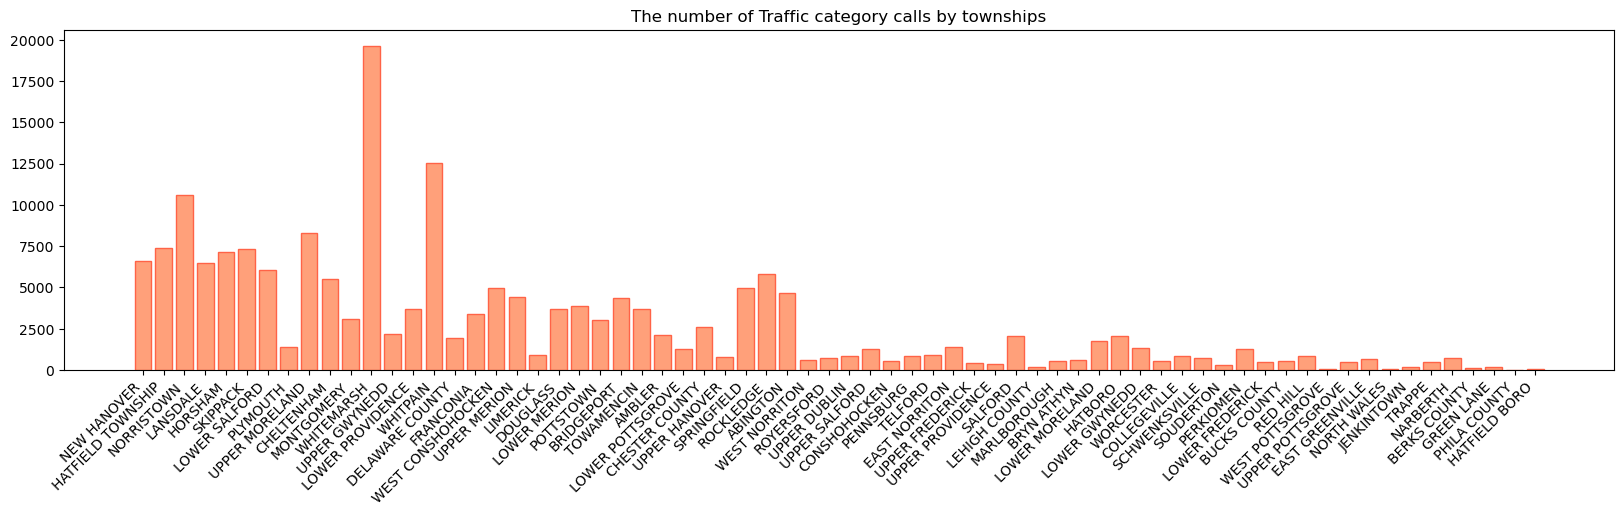

In [41]:
fig, ax= plt.subplots(figsize = (20,5))
ax.bar(townships, traffic_number, color='lightsalmon', edgecolor='tomato')
fig.autofmt_xdate(rotation=45)
ax.set_title('The number of ''Traffic'' category calls by townships')

In [42]:
#below there is a clearer version of those 3 charts above - a stacked bar chart with number of accidents depending on the category for each township
ii=statistics.mean(ems_number)
iii=statistics.mean(fire_number)
iiii=statistics.mean(traffic_number)
i=ii+iii+iiii #average number of calls

# ANOTHER STACKED BAR CHART - number of calls by accident category in townships

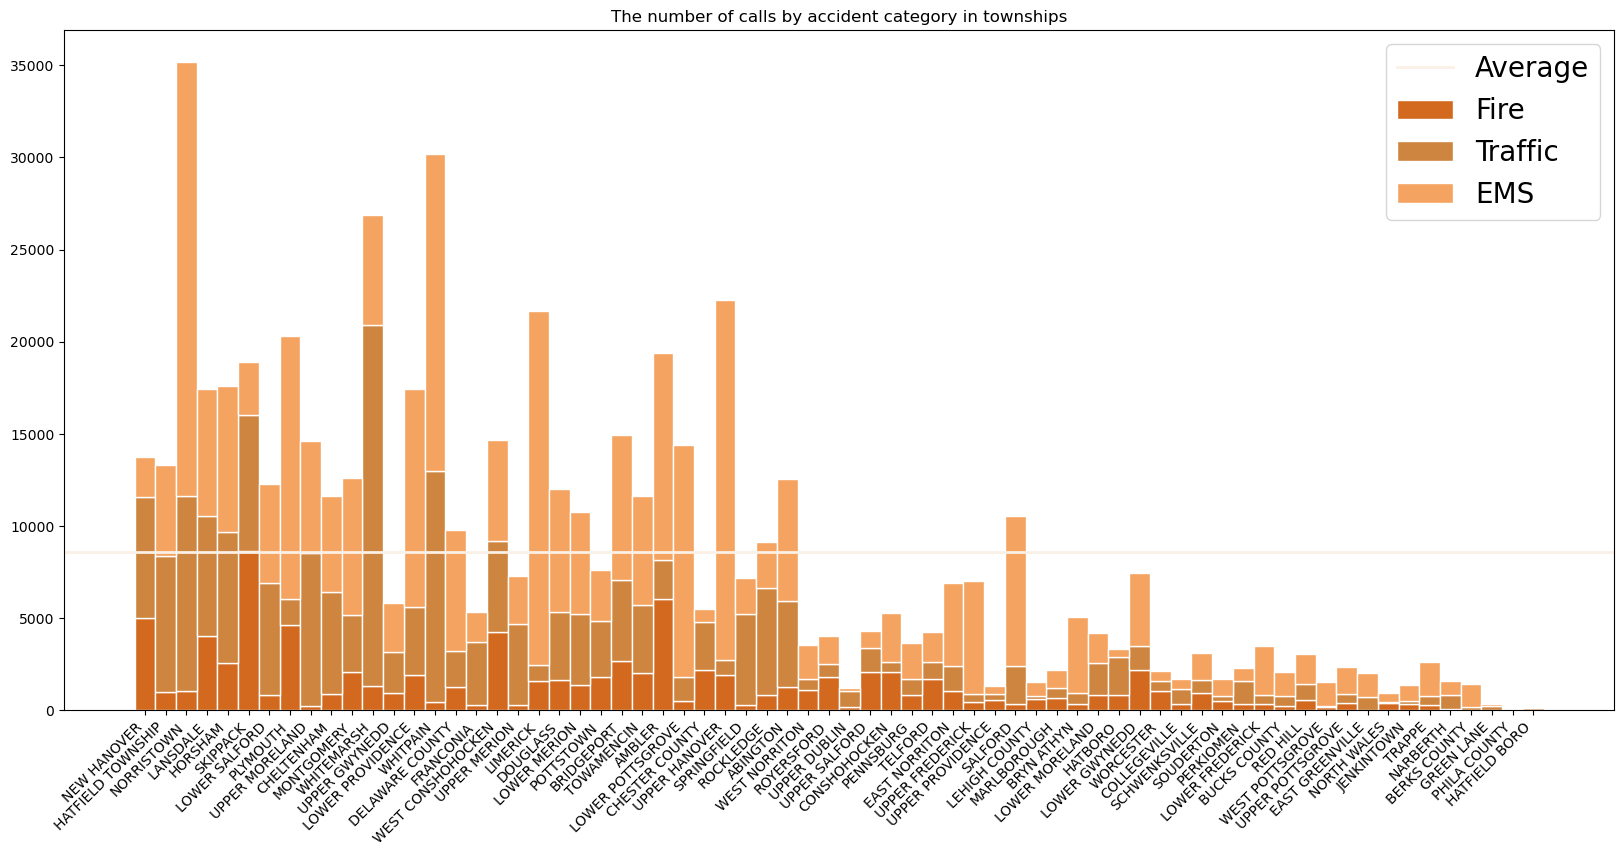

In [43]:
fig, ax= plt.subplots(figsize = (20,10))
barWidth = 1
bars = np.add(fire_number, traffic_number).tolist()
ax.bar(townships, fire_number, color='chocolate', edgecolor='white', width=barWidth)
ax.bar(townships, traffic_number, bottom=fire_number, color='peru', edgecolor='white', width=barWidth)
ax.bar(townships, ems_number, bottom=bars, color='sandybrown', edgecolor='white', width=barWidth)
ax.axhline(i,linewidth=2, color='linen') #the horizontal line on the chart is the average number of calls. This allows you to see which townships are showing an above-average number of emergency calls, and which are reducing it.
ax.set_title('The number of calls by accident category in townships') 
ax.legend(['Average','Fire','Traffic','EMS'],prop={'size': 20},loc=1)
fig.autofmt_xdate(rotation=45)
#plt.savefig('The number of calls by accident category in townships.jpg')